In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [160]:
data = pd.read_csv(r'D:\datasets\titanic\train.csv')

In [161]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [162]:
data = data[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
data

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [163]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [164]:
data

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
885,0,3,0,39.0
886,0,2,1,27.0
887,1,1,0,19.0
889,1,1,1,26.0


In [176]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=13)

In [166]:
train_data.corr()

,Survived,Pclass,Sex,Age
Survived,1.000000,-0.346438,-0.548114,-0.082371
Pclass,-0.346438,1.000000,0.136396,-0.390445
Sex,-0.548114,0.136396,1.000000,0.088012
Age,-0.082371,-0.390445,0.088012,1.000000


In [167]:
test_data

,Survived,Pclass,Sex,Age
728,0,2,1,25.0
555,0,1,1,62.0
426,1,2,0,28.0
278,0,3,1,7.0
617,0,3,0,26.0
...,...,...,...,...
641,1,1,0,24.0
338,1,3,1,45.0
211,1,2,0,35.0
191,0,2,1,19.0


In [177]:
x_train, y_train = train_data[['Pclass', 'Sex', 'Age']], train_data[['Survived']]
x_test, y_test = test_data[['Pclass', 'Sex', 'Age']], test_data[['Survived']]

In [178]:
d_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=20
)

d_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [179]:
y_predicted = d_tree.predict(x_test)
y_predicted

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

Если бы мы не пользовались имеющимися данными, а всегда говорили, что пассажир умрёт(константный классификатор), то наша точность(= доля верных ответов) была бы:

In [180]:
accuracy_score(np.array([0]*len(y_test)), y_test)

0.6013986013986014

Теперь же измерим точность предсказаний нашего классификатора:

In [181]:
accuracy_score(y_test, y_predicted)

0.8041958041958042

In [182]:
print(x_train.columns)
print(d_tree.feature_importances_)

Index(['Pclass', 'Sex', 'Age'], dtype='object')
[0.28333239 0.59622281 0.1204448 ]


[Text(697.5, 951.3000000000001, 'Sex <= 0.5\ngini = 0.483\nsamples = 571\nvalue = [338, 233]\nclass = Dead'),
 Text(348.75, 679.5, 'Pclass <= 2.5\ngini = 0.375\nsamples = 208\nvalue = [52, 156]\nclass = Alive'),
 Text(174.375, 407.70000000000005, 'Age <= 23.5\ngini = 0.092\nsamples = 124\nvalue = [6, 118]\nclass = Alive'),
 Text(87.1875, 135.89999999999998, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = Alive'),
 Text(261.5625, 135.89999999999998, 'gini = 0.122\nsamples = 92\nvalue = [6, 86]\nclass = Alive'),
 Text(523.125, 407.70000000000005, 'Age <= 27.5\ngini = 0.495\nsamples = 84\nvalue = [46, 38]\nclass = Dead'),
 Text(435.9375, 135.89999999999998, 'gini = 0.495\nsamples = 58\nvalue = [26, 32]\nclass = Alive'),
 Text(610.3125, 135.89999999999998, 'gini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = Dead'),
 Text(1046.25, 679.5, 'Pclass <= 1.5\ngini = 0.334\nsamples = 363\nvalue = [286, 77]\nclass = Dead'),
 Text(871.875, 407.70000000000005, 'Age <= 36.5\ngini = 0.493\nsample

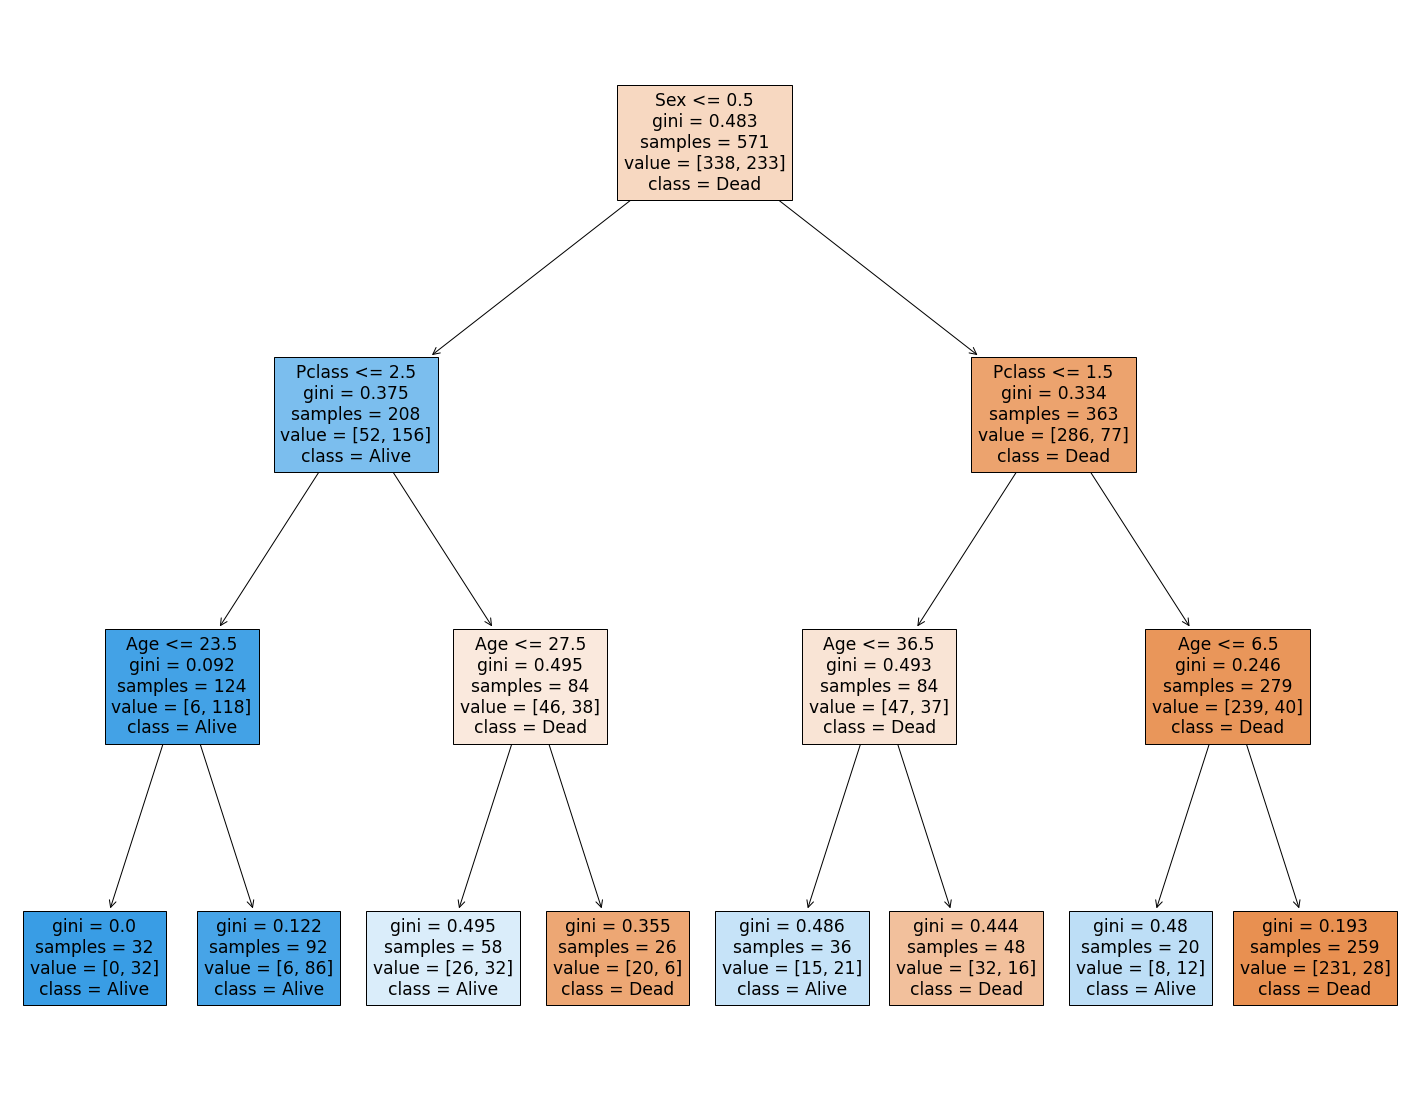

In [183]:
fig = plt.figure(figsize=(25,20))
plot_tree(
    d_tree, 
    feature_names= ['Pclass', 'Sex', 'Age'],  
    class_names=['Dead', 'Alive'], 
    filled=True,
    label='all'
    )

In [ ]:
x_train['Sex'].sum()

In [184]:
a = 5

dkfgverkugherougvoerg